# DWD_historical_weather: Beispiel-Notebook

#### Bundesland als globalen Parameter festlegen

In [7]:
BUNDESLAND = 'Berlin'

In [8]:
from DWD_hist_weather import tagestemp_land, tageswerte_land

import pandas as pd
import pickle

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

#### Das eigentliche Einlesen der Daten: Wenn vorhanden aus pickle, sonst **tageswerte_land** aus dem Modul aufrufen und die Daten vom DWD ziehen

In [9]:
pickle_dateiname = f'{BUNDESLAND}.pickle'
try:
    tageswerte = pickle.load(open(pickle_dateiname, 'rb'))
    print(f'Wetterdaten für {BUNDESLAND} aus pickle eingelesen.')
except (OSError, IOError):
    tageswerte = tageswerte_land(BUNDESLAND)
    pickle.dump(tageswerte, open(pickle_dateiname, 'wb'))
    print(f'\nWetterdaten für {BUNDESLAND} in pickle geschrieben.')

Wetterdaten für Berlin aus pickle eingelesen.


### DataFrame ausgeben

In [10]:
display(tageswerte)

,TempMean,HumidityMean,TempMax,TempMin,SunshineDuration,Jahr,Monat,Tag_des_Jahres
Datum,,,,,,,,
1876-01-01,2.200,NaN,3.500000,-3.000,NaN,1876,1,1
1876-01-02,2.500,NaN,2.800000,2.300,NaN,1876,1,2
1876-01-03,0.300,NaN,2.800000,-1.800,NaN,1876,1,3
1876-01-04,-5.800,NaN,-1.800000,-7.000,NaN,1876,1,4
1876-01-05,-9.800,NaN,-6.800000,-13.300,NaN,1876,1,5
...,...,...,...,...,...,...,...,...
2025-07-06,22.875,42.3525,29.625000,16.125,6.667,2025,7,187
2025-07-07,18.650,74.2300,24.425000,15.800,2.833,2025,7,188
2025-07-08,17.150,67.1250,22.200000,13.425,6.600,2025,7,189


### Heatmap der täglichen Durchschnittstemperaturen

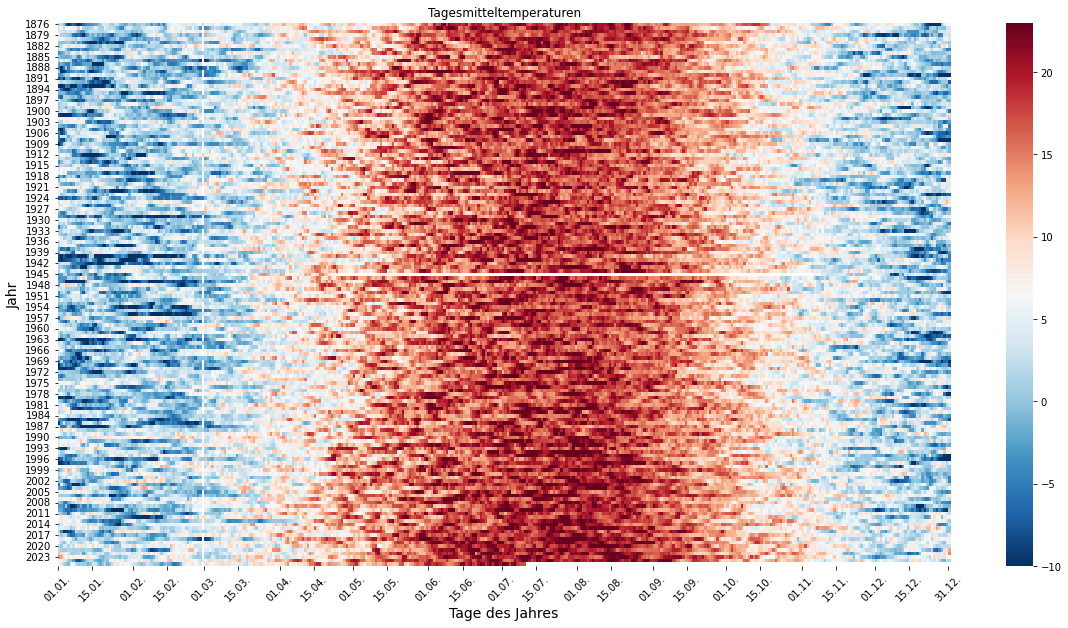

In [20]:
ana = tageswerte.copy()
ana['Tag_des_Jahres'] = ana.index.strftime('%m-%d')
ana = ana.pivot(index='Jahr', columns='Tag_des_Jahres', values='TempMean')

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(ana, vmin=-10, vmax=23, cmap="RdBu_r")
ax.axes.set_title("Tagesmitteltemperaturen")
ax.set_xlabel('Tage des Jahres', size=14)
ax.set_ylabel('Jahr', size=14)

# X-Achse: Ticks am 1. und 15. jedes Monats
tage = [f"{m:02d}-01" for m in range(1, 13)] + [f"{m:02d}-15" for m in range(1, 13)] + ["12-31"]
labels = [f"{t[3:5]}.{t[0:2]}." for t in tage]
ticks = [ana.columns.get_loc(t) for t in tage]
ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation=45)

plt.show()

### Jährliche Durchschnittstemperaturen plus 5-Jahres-Mittel

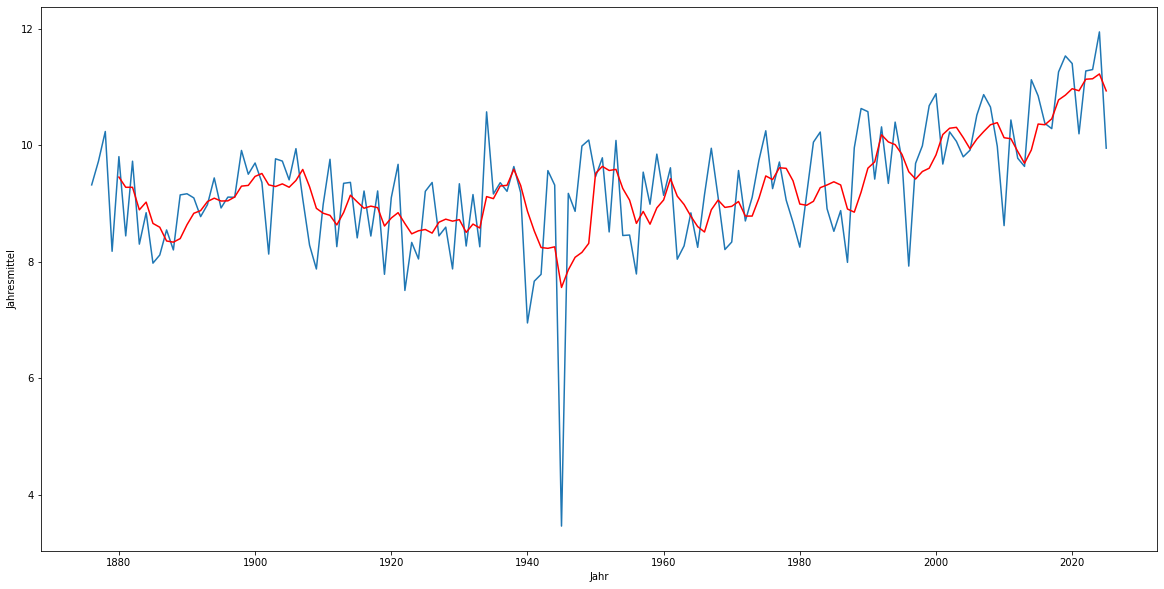

In [21]:
ana = tageswerte.pivot(index='Jahr', columns='Tag_des_Jahres', values='TempMean')

ana['Jahresmittel'] = ana.mean(axis=1)
ana['Jahresmittel5'] = ana['Jahresmittel'].rolling(5).mean()

plt.subplots(figsize=(20, 10))
sns.lineplot(data=ana, x='Jahr', y='Jahresmittel')
sns.lineplot(data=ana, x='Jahr', y='Jahresmittel5', color='red')

plt.show()